In [1]:
import pandas as pd
from Bio import SeqIO
import os
from IPython.display import Image
import matplotlib.pyplot as plt

RESULT_PATH = "/home/dallas/Data/DeepBGC/KOD1all"
RESULT_NAME = "KOD1all"
%matplotlib inline

In [2]:
def print_text_file(path, limit=50):
    with open(path) as f:
        for i, line in enumerate(f):
            if i == limit:
                print('...showing first {} lines only...'.format(limit))
                break
            print(line, end='')

In [3]:
bgcs = pd.read_csv(os.path.join(RESULT_PATH, RESULT_NAME+'.bgc.tsv'), sep='\t')
bgcs.head()

,sequence_id,detector,detector_version,detector_label,bgc_candidate_id,nucl_start,nucl_end,nucl_length,num_proteins,num_domains,...,Polyketide,RiPP,Saccharide,Terpene,deepbgc_score,clusterfinder_retrained_score,clusterfinder_geneborder_score,protein_ids,bio_pfam_ids,pfam_ids
0,NC_006624.1,clusterfinder_original,0.1.0,clusterfinder_original,NC_006624.1_10384-11365.1,10384,11365,981,2,10,...,0.32,0.20,0.03,0.31,NaN,NaN,NaN,NC_006624.1_NC_006624.1_11;NC_006624.1_NC_0066...,NaN,PF01894;PF02421;PF16897;PF10662;PF00009;PF0249...
1,NC_006624.1,clusterfinder_original,0.1.0,clusterfinder_original,NC_006624.1_22596-23862.1,22596,23862,1266,1,4,...,0.31,0.23,0.03,0.29,NaN,NaN,NaN,NC_006624.1_NC_006624.1_28,NaN,PF00670;PF07991;PF02826;PF05221
2,NC_006624.1,clusterfinder_original,0.1.0,clusterfinder_original,NC_006624.1_29403-32235.1,29403,32235,2832,3,11,...,0.04,0.20,0.00,0.23,NaN,NaN,NaN,NC_006624.1_NC_006624.1_35;NC_006624.1_NC_0066...,PF08241;PF08242,PF13360;PF13570;PF07381;PF01209;PF13489;PF0384...
3,NC_006624.1,deepbgc,0.1.0,deepbgc,NC_006624.1_31275-35824.1,31275,35824,4549,4,11,...,0.04,0.20,0.00,0.23,0.86736,NaN,NaN,NC_006624.1_NC_006624.1_37;NC_006624.1_NC_0066...,PF08241;PF08242,PF01209;PF13489;PF03848;PF01135;PF13847;PF1364...
4,NC_006624.1,clusterfinder_original,0.1.0,clusterfinder_original,NC_006624.1_37393-37870.1,37393,37870,477,1,13,...,0.33,0.22,0.03,0.32,NaN,NaN,NaN,NC_006624.1_NC_006624.1_43,NaN,PF04375;PF05529;PF08317;PF04513;PF13166;PF0458...


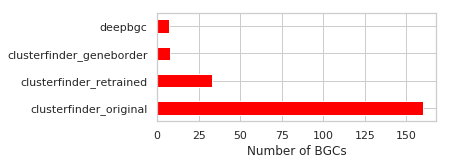

In [50]:
ax = bgcs['detector_label'].value_counts().plot.barh(figsize=(5, 2), color='red')
ax.set_xlabel('Number of BGCs');

Average BGC nucleotide length:
detector_label
clusterfinder_geneborder     4104.875000
clusterfinder_original       3227.737500
clusterfinder_retrained      2255.666667
deepbgc                     10957.285714
Name: nucl_length, dtype: float64


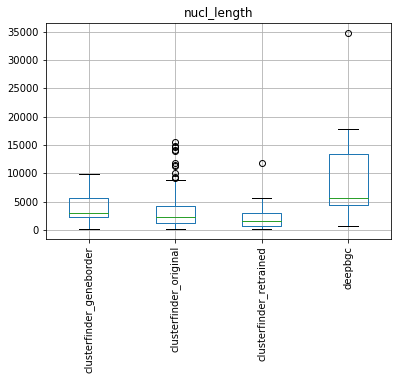

In [5]:
ax = bgcs.boxplot(column='nucl_length', by='detector_label')
plt.xticks(rotation=90)
ax.set_xlabel('')
ax.figure.suptitle('')
print('Average BGC nucleotide length:')
print(bgcs.groupby('detector_label')['nucl_length'].mean())


Average number of proteins in BGC:
detector_label
clusterfinder_geneborder     4.250000
clusterfinder_original       3.431250
clusterfinder_retrained      2.333333
deepbgc                     12.428571
Name: num_proteins, dtype: float64


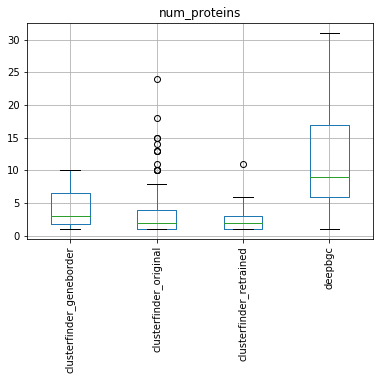

In [6]:
ax = bgcs.boxplot(column='num_proteins', by='detector_label')
plt.xticks(rotation=90)
ax.set_xlabel('')
ax.figure.suptitle('')
print('Average number of proteins in BGC:')
print(bgcs.groupby('detector_label')['num_proteins'].mean())

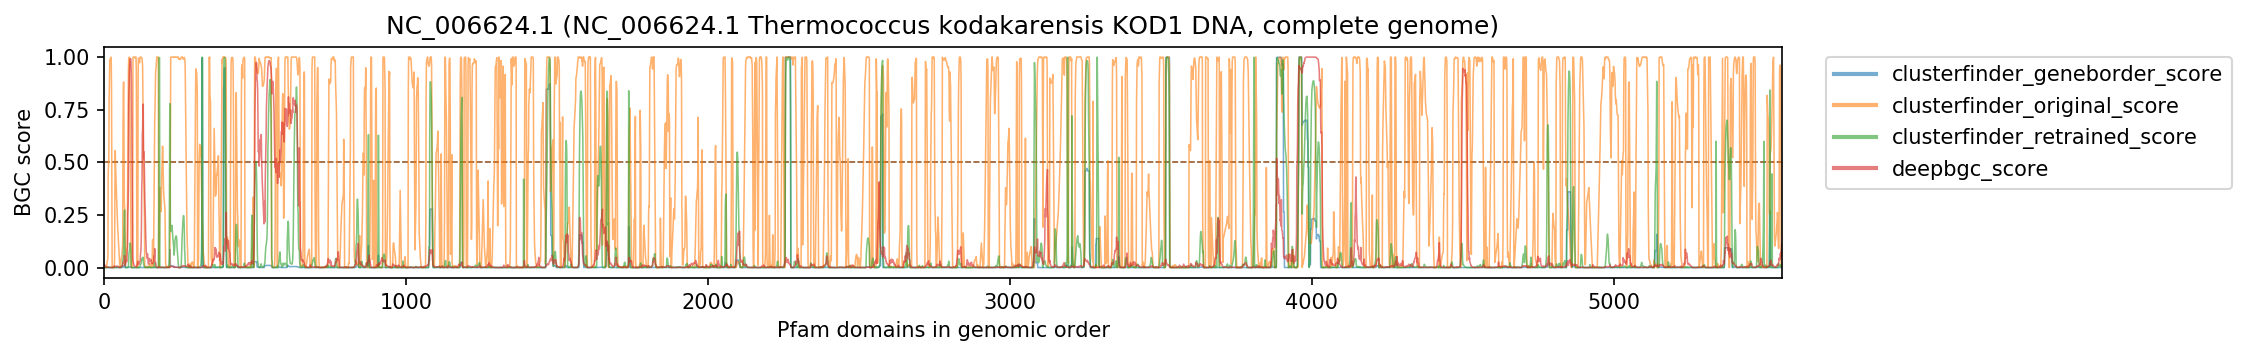

In [7]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME+'.score.png'))


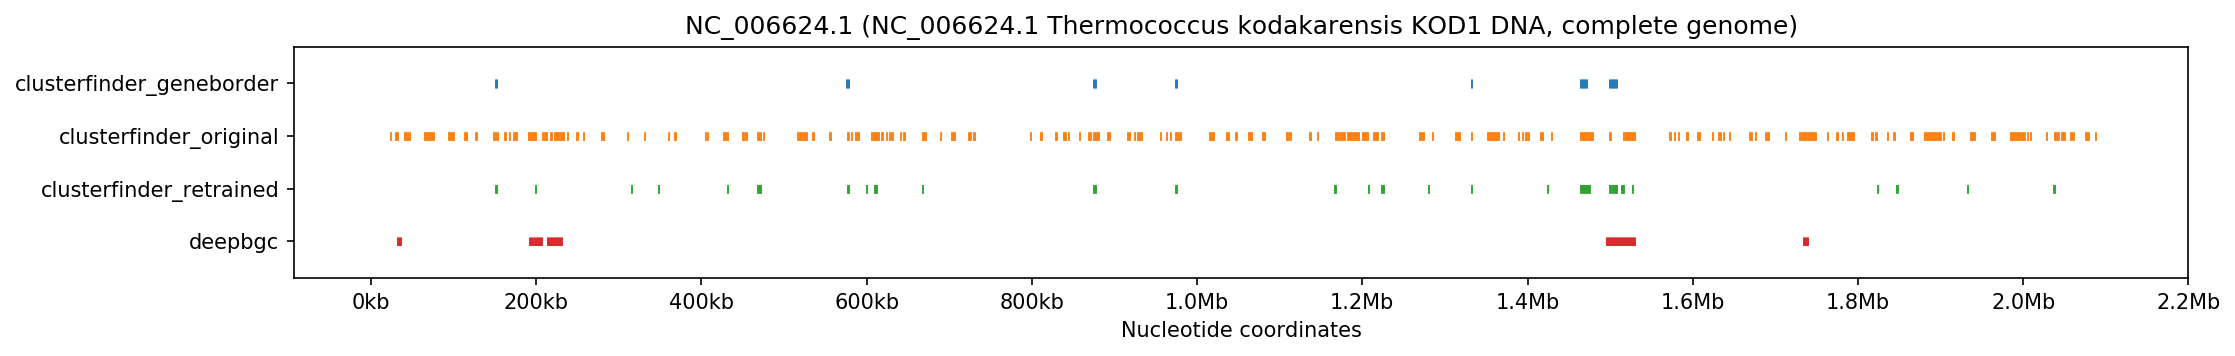

In [8]:
Image(filename=os.path.join(RESULT_PATH, 'evaluation', RESULT_NAME+'.bgc.png'))


Average number of proteins in BGC:
detector_label
clusterfinder_geneborder     4.250000
clusterfinder_original       3.431250
clusterfinder_retrained      2.333333
deepbgc                     12.428571
Name: num_proteins, dtype: float64


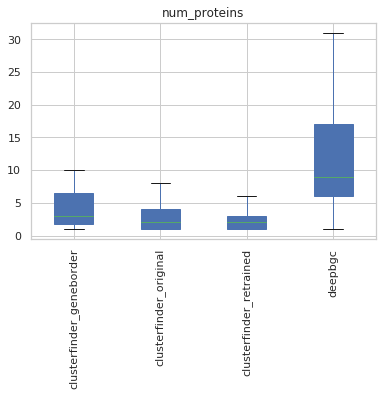

In [28]:
ax = bgcs.boxplot(column='num_proteins', by='detector_label', showfliers=False, patch_artist=True)
plt.xticks(rotation=90)
ax.set_xlabel('')
ax.figure.suptitle('')
print('Average number of proteins in BGC:')
print(bgcs.groupby('detector_label')['num_proteins'].mean())

In [59]:
import seaborn as sns
from statannot import add_stat_annotation

pvalue annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

clusterfinder_original v.s. deepbgc: MWW RankSum two-sided P_val=4.242e-03 U_stat=2.105e+02
clusterfinder_retrained v.s. deepbgc: MWW RankSum two-sided P_val=2.394e-03 U_stat=3.250e+01
clusterfinder_retrained v.s. clusterfinder_original: MWW RankSum two-sided P_val=1.325e-01 U_stat=2.214e+03


(<matplotlib.axes._subplots.AxesSubplot at 0x7f9616672358>,
 [{'box1': 'clusterfinder_original',
   'box2': 'deepbgc',
   'formattedOutput': 'MWW RankSum two-sided P_val=4.242e-03 U_stat=2.105e+02',
   'pvalue': 0.004241567151397033,
   'testShortName': 'M.W.W.'},
  {'box1': 'clusterfinder_retrained',
   'box2': 'deepbgc',
   'formattedOutput': 'MWW RankSum two-sided P_val=2.394e-03 U_stat=3.250e+01',
   'pvalue': 0.0023943864260520704,
   'testShortName': 'M.W.W.'},
  {'box1': 'clusterfinder_retrained',
   'box2': 'clusterfinder_original',
   'formattedOutput': 'MWW RankSum two-sided P_val=1.325e-01 U_stat=2.214e+03',
   'pvalue': 0.13254146461310742,
   'testShortName': 'M.W.W.'}])

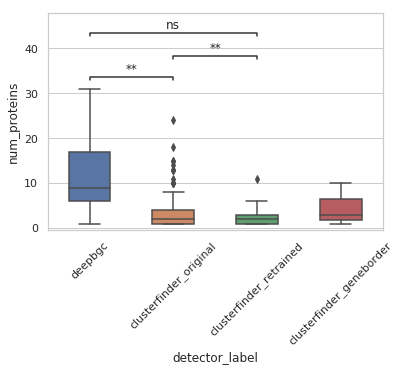

In [72]:
ax = sns.boxplot(y = 'num_proteins', x = 'detector_label', data = bgcs, width=0.5,
                 order = ['deepbgc', 'clusterfinder_original', 'clusterfinder_retrained', 'clusterfinder_geneborder'])
plt.setp(ax.get_xticklabels(), rotation=45)

add_stat_annotation(ax, data=bgcs, y = 'num_proteins', x = 'detector_label',
                   boxPairList=[("clusterfinder_original", "deepbgc"),
                                ("clusterfinder_retrained", "deepbgc"), ("clusterfinder_retrained", "clusterfinder_original")
                                ], test='Mann-Whitney', textFormat='star', loc='inside', verbose=2)
                    
